In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()

# Features
X = data.data

#Target (0 - cancer, 1 - healthy)
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = y
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  Target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [ ]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='Target', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Cancer', 'Healthy'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [ ]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

The "Breast Cancer Wisconsin (Diagnostic)" dataset contains information on various cell characteristics and a target variable indicating whether a cell is benign or malignant. Cells labeled 0 belong to the malignant class, and cells labeled 1 belong to the benign class. The dataset contains 212 samples labeled as malignant and 357 samples labeled as benign. The data is moderately imbalanced, which may affect the quality of the models. The dataset has no missing values, and all values are numerical. We will visualize pairwise scatter plots of the target variable with the features, using only the features that characterize the mean values to avoid overloading the graph.

In [ ]:
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension']
df_selected = df[selected_features + ['Target']]
sns.pairplot(df_selected, hue = 'Target')

On the visualization, there is a perfect correlation of the mean radius with the mean area and mean perimeter. At the same time, we see a clear separation by classes for these features, so despite being multicollinear, they can be useful for the classification model. The least clearly separated features in the pairwise visualization are mean symmetry with mean smoothness and mean symmetry with mean fractal dimension, indicating that these features may be less effective for classification.

Additionally, we see that clusters are not separated by distance for any feature, which could be a potential problem for methods like spectral clustering. However, the distributions of the target feature for each feature visually resemble normal distributions, suggesting high effectiveness for clustering using the Gaussian mixture model.





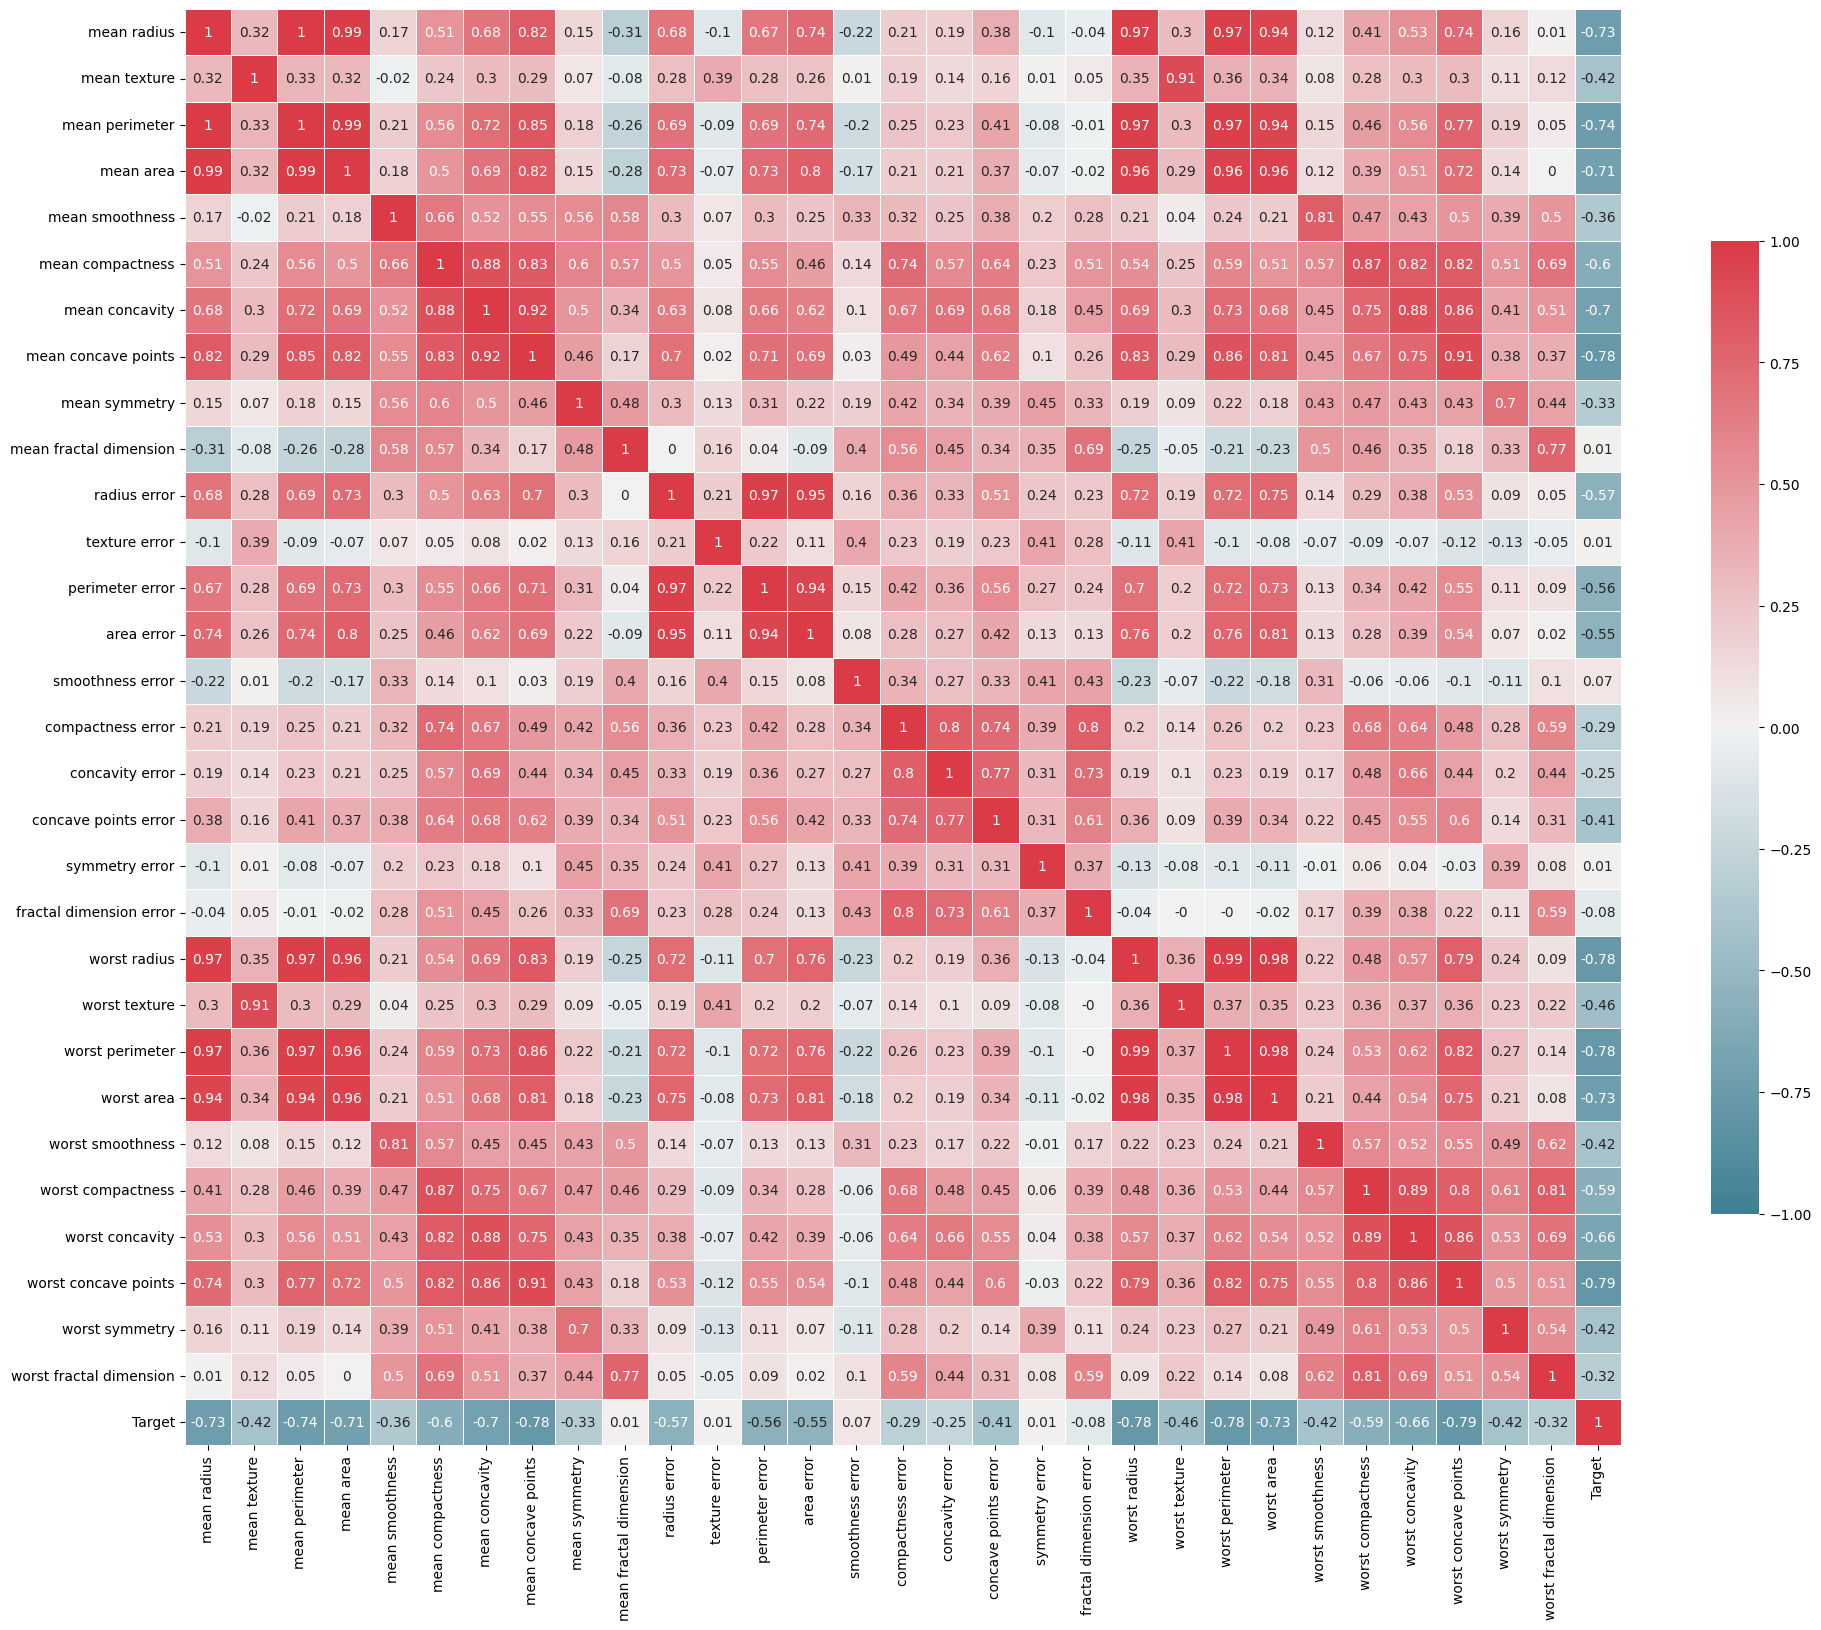

In [ ]:
# Generate and visualize the correlation matrix
plt.figure(figsize=(20,20))
corr = df.corr().round(2)

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()


On the correlation map, we indeed see a perfect correlation of the mean radius with the mean area and mean perimeter, and a similar situation between the worst radius, perimeter, and area. These features also strongly correlate with mean concave points and mean concavity. Considering the large number of features (31), it makes sense to reduce the dimensionality using one of the following methods:

Removing multicollinear features
Removing features with a low degree of correlation with the target variable
Applying the PCA method
Removing multicollinear features (for example, out of 3 strongly correlated features: mean radius, mean perimeter, mean area, removing 2 and leaving only 1) significantly reduced the quality of the models, so this approach was discarded.

Experiments were conducted by building models on selected features with a high degree of correlation with the target variable and on features generated using PCA. The quality of the models built on features generated by PCA in sufficient quantity (8 were chosen) significantly exceeded the quality of models built on selective original features. Therefore, further experiments were conducted with models built on generated features. The selective features are stored in df_reduced and the standardized selective data is stored in X_scaled_reduced.

In [ ]:
# Get the absolute value of the correlation
cor_target = abs(corr["Target"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]
relevant_feature_names = relevant_features.index.tolist()
relevant_feature_names

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'radius error',
 'perimeter error',
 'area error',
 'compactness error',
 'concavity error',
 'concave points error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'Target']

In [ ]:
df_reduced = df[relevant_feature_names].copy()

In [ ]:
# Normalization/standartization of data
def data_scale(data, scaler_type='minmax'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    if scaler_type == 'std':
        scaler = StandardScaler()
    if scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res

data = df.drop(columns='Target')
data_reduced = df_reduced.drop(columns='Target')
X_scaled = data_scale(data, scaler_type='std')
X_scaled_reduced = data_scale(data_reduced, scaler_type='std')
df_scaled = pd.DataFrame(X_scaled, columns=data.columns)
df_scaled['Target'] = df['Target']
df_scaled.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                2.255747  ...      -1.359293         2.303601    2.001237   
1               -0.868652  ...      -0.369203         1.535126    1.890489   
2               -0.398008  ...      -0.023974         1.347475    1.456285   
3                4.910919  ...       0.133984        -0.249939   -0.550021   
4               -0.562450  ...      -1.466770         1.338539    1.220724   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0          1.307686           2.616665         2.109526              2.296076   
1         -0.375612          -0.430444        -0.146749              1.087084   
2          0.527407           1.082932         0.854974              1.955000   
3          3.394275           3.893397         1.989588              2.175786   
4          0.220556          -0.313395         0.613179              0.729259   

   worst symmetry  worst fractal dimension  Target  
0        2.750622                 1.937015       0  
1       -0.243890                 0.281190       0  
2        1.152255                 0.201391       0  
3        6.046041                 4.935010       0  
4       -0.868353                -0.397100       0  

[5 rows x 31 columns]

<Figure size 600x400 with 0 Axes>

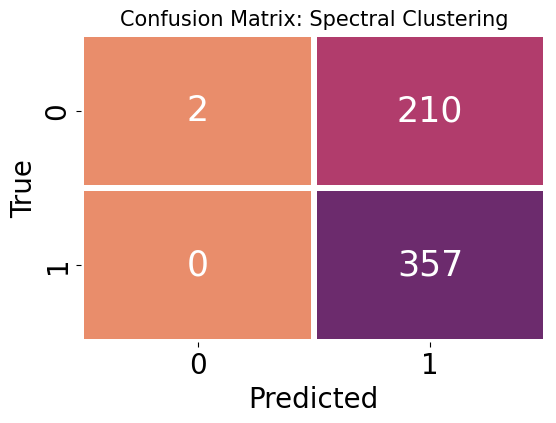

Model: Spectral Clustering
F1-score: 0.7727
Adjusted Rand Index: 0.0048
--------------------------------------------------


<Figure size 600x400 with 0 Axes>

Model: KMeans
F1-score: 0.9308
Adjusted Rand Index: 0.6707
--------------------------------------------------


<Figure size 600x400 with 0 Axes>

Model: Gaussian Mixture
F1-score: 0.9522
Adjusted Rand Index: 0.7740
--------------------------------------------------


In [ ]:
# Compare results of the different clasterization models
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, f1_score, adjusted_rand_score

clustering_models = [
    ('Spectral Clustering', SpectralClustering(n_clusters=2, random_state=1)),
    ('KMeans', KMeans(n_clusters=2, random_state=1)),
    ('Gaussian Mixture', GaussianMixture(n_components=2, random_state=1))
]

for name, model in clustering_models:
  if name == 'Gaussian Mixture':
    model.fit(X_scaled)
    predicted_labels = model.predict(X_scaled)
  else:
    predicted_labels = model.fit_predict(X_scaled)

  # invert predicted labels if the model predicts labels that are the opposite of actual labels
  if f1_score(y, predicted_labels) < f1_score(y, 1 - predicted_labels):
    predicted_labels = 1 - predicted_labels
  conf_mat = confusion_matrix(y, predicted_labels)
  f1 = f1_score(y, predicted_labels)
  ars = adjusted_rand_score(y, predicted_labels)
  plt.figure(figsize=(6,4))


  # visualization of confusion matrix
  plt.figure(figsize=(6,4))
  sns.heatmap(conf_mat, annot=True, fmt='d', linewidth=3, annot_kws={'size':25}, cbar=False, cmap=sns.color_palette('flare'))
  plt.title(f'Confusion Matrix: {name}', fontsize=15)
  plt.ylabel('True', fontsize=20)
  plt.xlabel('Predicted', fontsize=20)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.show()
  print(f'Model: {name}')
  print(f'F1-score: {f1:.4f}')
  print(f'Adjusted Rand Index: {ars:.4f}')
  print('-'*50)



Thus, the assumption about the inefficiency of spectral clustering and the high effectiveness of clustering using Gaussian mixtures was confirmed. The data contain many instances at the cluster boundaries, making spectral clustering unable to separate the data into 2 clusters, effectively assigning almost all samples to one cluster. In contrast, KMeans and Gaussian mixture models showed good results. According to the Adjusted Rand Index (ARI), the Gaussian mixture model performed the best, with the predicted class labels closely matching the actual labels.

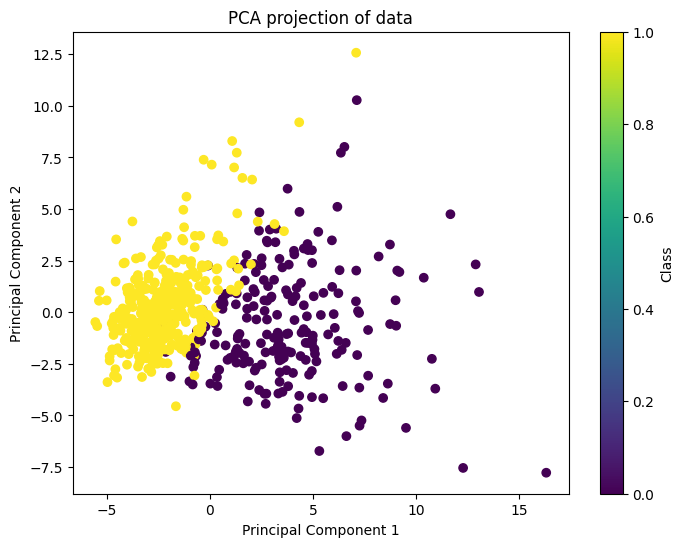

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA projection of data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

In [ ]:
# Generate more feature using PCA to use them for building models
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)


For visualizing the scatter plot of the target feature distribution by classes, dimensionality reduction to 2 features was applied. For building classification models, the dimensionality was reduced from 31 to 8 features using PCA.

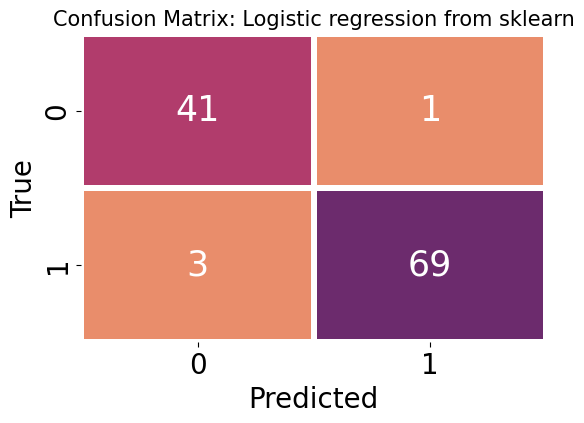

F1 Score: 0.971830985915493
Precision: 0.9857142857142858


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42) #use features generated by PCA
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42) #use all the features
#X_train, X_test, y_train, y_test = train_test_split(X_scaled_reduced, y, test_size=0.2, stratify=y, random_state=42 #use selected features from original dataset

log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

# Prediction
y_pred = log_reg.predict(X_test)

# Model evaluation, calculating and visualizing confusion matrix
cm =  confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size':25}, cbar=False, cmap=sns.color_palette('flare'))
plt.title('Confusion Matrix: Logistic regression from sklearn', fontsize=15)
plt.ylabel('True', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


The Logistic Regression function from the sklearn library demonstrates an F1 score of 0.97 and a precision of 0.986, which is particularly important in the context of the dataset we are working with. The precision metric focuses on the false positive count, meaning the number of samples incorrectly classified as positive. In our context, this refers to the number of samples incorrectly classified as healthy when they are actually malignant. As seen from the confusion matrix, only one out of 42 malignant samples was misclassified.

The built-in library function is already optimized; we will now check if custom implementations can achieve the same level of quality.

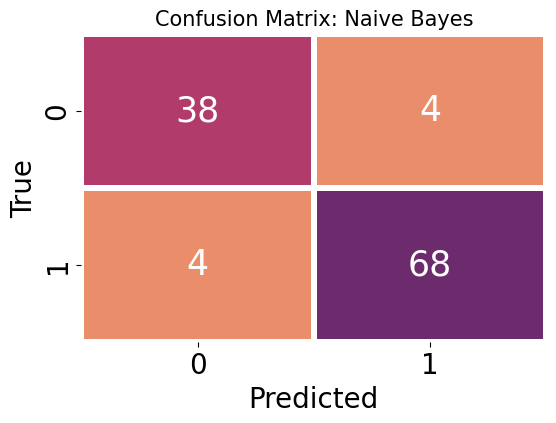

F1 score: 0.9444444444444444
Precision: 0.9444444444444444


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Learning GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_train)

# Extrate weights for each cluster
initial_weights = gmm.weights_

# Initialize priors as weights from GMM
gnb = GaussianNB(priors=initial_weights)
#gnb = GaussianNB()

# Learn classification model
gnb.fit(X_train, y_train)

# Prediction
y_pred = gnb.predict(X_test)

# Calculate and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size':25}, cbar=False, cmap=sns.color_palette('flare'))
plt.title('Confusion Matrix: Naive Bayes', fontsize=15)
plt.ylabel('True', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Наївний баївський класифікатор був оптимізований тим, що в якості апріорних імовірностей були передані ваги, отримані з моделі Гаусівських сумішей. Це трохи підвищує її якість, і в цілому модель демонструє непоганий результат: F1 score = 0.94 та Precision = 0.94, проте поступається моделі логістичної регресії. Первіримо кастомні реалізації моделі логістичної регресії із оптимізацією різними методами градієнтного спуску: звичайним, Adam, Adamax, Adadelta, Nadam.

In [ ]:
# Logistic regression with gradient descent optimization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function - binary cross-entropy
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Function for training the model
def logistic_regression_train(X_train, y_train, learning_rate=0.01, num_epochs=400):
    num_features = X_train.shape[1]
    num_samples = X_train.shape[0]

    # Weigths and bias initialization
    weights = np.zeros((num_features,))
    bias = 0

    # Model training
    for epoch in range(num_epochs):
        # Calculate weighted sum using vectorization
        linear_model = np.dot(X_train, weights) + bias

        #  Calculate probabilities using sigmoid activation function
        y_pred = sigmoid(linear_model)

        # Calculate gradients using derivatives of binary cross-entropy function
        dw = (1 / num_samples) * np.dot(X_train.T, (y_pred - y_train))
        db = (1 / num_samples) * np.sum(y_pred - y_train)

        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Calculate losses
        loss = binary_cross_entropy(y_train, y_pred)

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

    return weights, bias

# Function for runnig the logistic regression model
def logistic_regression_predict(X_test, weights, bias):
    linear_model = np.dot(X_test, weights) + bias
    y_pred = sigmoid(linear_model)
    return y_pred.round()

# Train the model
weights, bias = logistic_regression_train(X_train, y_train, learning_rate=0.01, num_epochs=100)

# Run the model
y_pred = logistic_regression_predict(X_test, weights, bias)

# Calculate and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size':25}, cbar=False, cmap=sns.color_palette('flare'))
plt.title('Confusion Matrix: Gradient Descent optimization', fontsize=15)
plt.ylabel('True', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Epoch [10/100], Loss: 0.5501
Epoch [20/100], Loss: 0.4574
Epoch [30/100], Loss: 0.3986
Epoch [40/100], Loss: 0.3577
Epoch [50/100], Loss: 0.3273
Epoch [60/100], Loss: 0.3038
Epoch [70/100], Loss: 0.2849
Epoch [80/100], Loss: 0.2693
Epoch [90/100], Loss: 0.2561
Epoch [100/100], Loss: 0.2449


F1 score: 0.9583333333333334
Precision: 0.9583333333333334


In [ ]:
# Logistic regression with Adam gradient descent optimization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Function for training the model
def logistic_regression_train_adam(X_train, y_train, learning_rate=0.01, num_epochs=400, beta1=0.9, beta2=0.999, epsilon=1e-8):
    num_features = X_train.shape[1]
    num_samples = X_train.shape[0]

    # Weigths and bias initialization
    weights = np.zeros((num_features,))
    bias = 0

    # Moments initialization
    m_w, v_w = np.zeros_like(weights), np.zeros_like(weights)
    m_b, v_b = 0, 0

    # Model training
    for epoch in range(num_epochs):
        # Calculate weighted sum using vectorization
        linear_model = np.dot(X_train, weights) + bias

        # Calculate probabilities using sigmoid activation function
        y_pred = sigmoid(linear_model)

        # Calculate gradients using derivatives of binary cross-entropy function
        dw = (1 / num_samples) * np.dot(X_train.T, (y_pred - y_train))
        db = (1 / num_samples) * np.sum(y_pred - y_train)

        # Update moments
        m_w = beta1 * m_w + (1 - beta1) * dw
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        m_b = beta1 * m_b + (1 - beta1) * db
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

        # Correction of moment biases
        m_w_hat = m_w / (1 - beta1 ** (epoch + 1))
        v_w_hat = v_w / (1 - beta2 ** (epoch + 1))
        m_b_hat = m_b / (1 - beta1 ** (epoch + 1))
        v_b_hat = v_b / (1 - beta2 ** (epoch + 1))


        # Update parameters
        weights -= learning_rate * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        bias -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

        # Calculate loss function
        loss = binary_cross_entropy(y_train, y_pred)

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

    return weights, bias

# Function for runnig the logistic regression model
def logistic_regression_predict(X_test, weights, bias):
    linear_model = np.dot(X_test, weights) + bias
    y_pred = sigmoid(linear_model)
    return y_pred.round()

# Learn the model
weights, bias = logistic_regression_train_adam(X_train, y_train)

# Run the model
y_pred = logistic_regression_predict(X_test, weights, bias)

# Calculate and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size':25}, cbar=False, cmap=sns.color_palette('flare'))
plt.title('Confusion Matrix: ADAM Gradient Descent optimization', fontsize=15)
plt.ylabel('True', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Epoch [10/400], Loss: 0.5342
Epoch [20/400], Loss: 0.4173
Epoch [30/400], Loss: 0.3414
Epoch [40/400], Loss: 0.2901
Epoch [50/400], Loss: 0.2544
Epoch [60/400], Loss: 0.2286
Epoch [70/400], Loss: 0.2092
Epoch [80/400], Loss: 0.1941
Epoch [90/400], Loss: 0.1819
Epoch [100/400], Loss: 0.1719
Epoch [110/400], Loss: 0.1634
Epoch [120/400], Loss: 0.1561
Epoch [130/400], Loss: 0.1497
Epoch [140/400], Loss: 0.1441
Epoch [150/400], Loss: 0.1392
Epoch [160/400], Loss: 0.1347
Epoch [170/400], Loss: 0.1307
Epoch [180/400], Loss: 0.1271
Epoch [190/400], Loss: 0.1237
Epoch [200/400], Loss: 0.1207
Epoch [210/400], Loss: 0.1179
Epoch [220/400], Loss: 0.1153
Epoch [230/400], Loss: 0.1129
Epoch [240/400], Loss: 0.1106
Epoch [250/400], Loss: 0.1085
Epoch [260/400], Loss: 0.1066
Epoch [270/400], Loss: 0.1048
Epoch [280/400], Loss: 0.1030
Epoch [290/400], Loss: 0.1014
Epoch [300/400], Loss: 0.0999
Epoch [310/400], Loss: 0.0985
Epoch [320/400], Loss: 0.0971
Epoch [330/400], Loss: 0.0958
Epoch [340/400], Lo

F1 score: 0.971830985915493
Precision: 0.9857142857142858


Epoch [10/400], Loss: 0.5413
Epoch [20/400], Loss: 0.4361
Epoch [30/400], Loss: 0.3689
Epoch [40/400], Loss: 0.3236
Epoch [50/400], Loss: 0.2915
Epoch [60/400], Loss: 0.2676
Epoch [70/400], Loss: 0.2492
Epoch [80/400], Loss: 0.2344
Epoch [90/400], Loss: 0.2223
Epoch [100/400], Loss: 0.2121
Epoch [110/400], Loss: 0.2033
Epoch [120/400], Loss: 0.1957
Epoch [130/400], Loss: 0.1890
Epoch [140/400], Loss: 0.1831
Epoch [150/400], Loss: 0.1777
Epoch [160/400], Loss: 0.1729
Epoch [170/400], Loss: 0.1685
Epoch [180/400], Loss: 0.1645
Epoch [190/400], Loss: 0.1608
Epoch [200/400], Loss: 0.1573
Epoch [210/400], Loss: 0.1542
Epoch [220/400], Loss: 0.1512
Epoch [230/400], Loss: 0.1484
Epoch [240/400], Loss: 0.1458
Epoch [250/400], Loss: 0.1434
Epoch [260/400], Loss: 0.1410
Epoch [270/400], Loss: 0.1389
Epoch [280/400], Loss: 0.1368
Epoch [290/400], Loss: 0.1348
Epoch [300/400], Loss: 0.1329
Epoch [310/400], Loss: 0.1312
Epoch [320/400], Loss: 0.1295
Epoch [330/400], Loss: 0.1278
Epoch [340/400], Lo

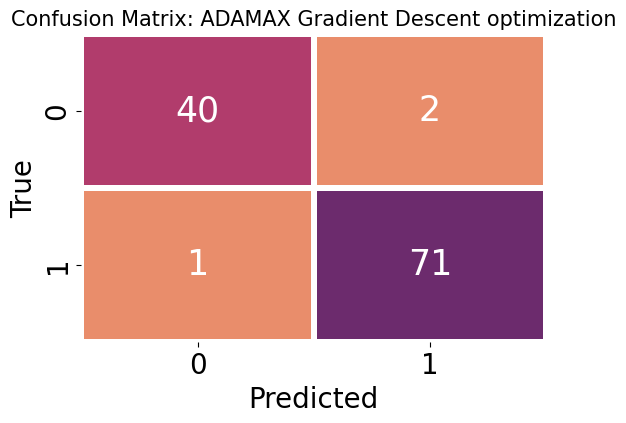

F1 score: 0.9793103448275863
Precision: 0.9726027397260274


In [ ]:
# Logistic regression with Adamax gradient descent optimization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Function for training the model
def logistic_regression_train_adamax(X_train, y_train, learning_rate=0.01, num_epochs=400, beta1=0.9, beta2=0.999, epsilon=1e-8):
    num_features = X_train.shape[1]
    num_samples = X_train.shape[0]

    # Weigths and bias initialization
    weights = np.zeros((num_features,))
    bias = 0

    # Moments initialization
    m_w, u_w = np.zeros_like(weights), np.zeros_like(weights)
    m_b, u_b = 0, 0

    # Model training
    for epoch in range(num_epochs):
        # Calculate weighted sum using vectorization
        linear_model = np.dot(X_train, weights) + bias

        # Calculate probabilities using sigmoid activation function
        y_pred = sigmoid(linear_model)

        # Calculate gradients using derivatives of binary cross-entropy
        dw = (1 / num_samples) * np.dot(X_train.T, (y_pred - y_train))
        db = (1 / num_samples) * np.sum(y_pred - y_train)

        # Update moments
        m_w = beta1 * m_w + (1 - beta1) * dw
        u_w = np.maximum(beta2 * u_w, np.abs(dw))
        m_b = beta1 * m_b + (1 - beta1) * db
        u_b = np.maximum(beta2 * u_b, np.abs(db))

        # Correction of moment biases
        m_w_hat = m_w / (1 - beta1 ** (epoch + 1))
        m_b_hat = m_b / (1 - beta1 ** (epoch + 1))


        # Update parameters
        weights -= learning_rate / (u_w + epsilon) * m_w_hat
        bias -= learning_rate / (u_b + epsilon) * m_b_hat

        # Calculate loss function
        loss = binary_cross_entropy(y_train, y_pred)

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

    return weights, bias

# Function for runnig the logistic regression model
def logistic_regression_predict(X_test, weights, bias):
    linear_model = np.dot(X_test, weights) + bias
    y_pred = sigmoid(linear_model)
    return y_pred.round()

# Learn the model
weights, bias = logistic_regression_train_adamax(X_train, y_train)

# Run the model
y_pred = logistic_regression_predict(X_test, weights, bias)

# Calculate and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size':25}, cbar=False, cmap=sns.color_palette('flare'))
plt.title('Confusion Matrix: ADAMAX Gradient Descent optimization', fontsize=15)
plt.ylabel('True', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

In [ ]:
# Logistic regression with Adadelta gradient descent optimization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Function for training the model
def logistic_regression_train_adadelta(X_train, y_train, rho=0.95, epsilon=1e-6, num_epochs=400):
    num_features = X_train.shape[1]
    num_samples = X_train.shape[0]

    # Weigths and bias initialization
    weights = np.zeros((num_features,))
    bias = 0

    # Moments initialization
    E_grad_w, E_dx_w = np.zeros_like(weights), np.zeros_like(weights)
    E_grad_b, E_dx_b = 0, 0

    # Model training
    for epoch in range(num_epochs):
        # Calculate weighted sum using vectorization
        linear_model = np.dot(X_train, weights) + bias

        # Calculate probabilities using sigmoid activation function
        y_pred = sigmoid(linear_model)

        # Calculate gradients using derivatives of binary cross-entropy function
        dw = (1 / num_samples) * np.dot(X_train.T, (y_pred - y_train))
        db = (1 / num_samples) * np.sum(y_pred - y_train)

        # Update moments
        E_grad_w = rho * E_grad_w + (1 - rho) * dw ** 2
        E_grad_b = rho * E_grad_b + (1 - rho) * db ** 2

        # Update parameters
        weights -= np.sqrt(E_dx_w + epsilon) / np.sqrt(E_grad_w + epsilon) * dw
        bias -= np.sqrt(E_dx_b + epsilon) / np.sqrt(E_grad_b + epsilon) * db

        # Calculate loss function
        loss = binary_cross_entropy(y_train, y_pred)

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

    return weights, bias

# Function for runnig the logistic regression model
def logistic_regression_predict(X_test, weights, bias):
    linear_model = np.dot(X_test, weights) + bias
    y_pred = sigmoid(linear_model)
    return y_pred.round()

# Train the model
weights, bias = logistic_regression_train_adadelta(X_train, y_train)

# run the model
y_pred = logistic_regression_predict(X_test, weights, bias)

# Calculate and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size':25}, cbar=False, cmap=sns.color_palette('flare'))
plt.title('Confusion Matrix: ADADELTA Gradient Descent optimization', fontsize=15)
plt.ylabel('True', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Epoch [10/400], Loss: 0.6496
Epoch [20/400], Loss: 0.6240
Epoch [30/400], Loss: 0.6035
Epoch [40/400], Loss: 0.5854
Epoch [50/400], Loss: 0.5688
Epoch [60/400], Loss: 0.5532
Epoch [70/400], Loss: 0.5384
Epoch [80/400], Loss: 0.5243
Epoch [90/400], Loss: 0.5107
Epoch [100/400], Loss: 0.4978
Epoch [110/400], Loss: 0.4853
Epoch [120/400], Loss: 0.4732
Epoch [130/400], Loss: 0.4617
Epoch [140/400], Loss: 0.4505
Epoch [150/400], Loss: 0.4398
Epoch [160/400], Loss: 0.4294
Epoch [170/400], Loss: 0.4194
Epoch [180/400], Loss: 0.4098
Epoch [190/400], Loss: 0.4005
Epoch [200/400], Loss: 0.3915
Epoch [210/400], Loss: 0.3829
Epoch [220/400], Loss: 0.3745
Epoch [230/400], Loss: 0.3664
Epoch [240/400], Loss: 0.3586
Epoch [250/400], Loss: 0.3510
Epoch [260/400], Loss: 0.3436
Epoch [270/400], Loss: 0.3365
Epoch [280/400], Loss: 0.3297
Epoch [290/400], Loss: 0.3230
Epoch [300/400], Loss: 0.3166
Epoch [310/400], Loss: 0.3103
Epoch [320/400], Loss: 0.3042
Epoch [330/400], Loss: 0.2983
Epoch [340/400], Lo

F1 score: 0.965034965034965
Precision: 0.971830985915493


Epoch [10/400], Loss: 0.5042
Epoch [20/400], Loss: 0.3961
Epoch [30/400], Loss: 0.3269
Epoch [40/400], Loss: 0.2798
Epoch [50/400], Loss: 0.2467
Epoch [60/400], Loss: 0.2226
Epoch [70/400], Loss: 0.2042
Epoch [80/400], Loss: 0.1898
Epoch [90/400], Loss: 0.1782
Epoch [100/400], Loss: 0.1685
Epoch [110/400], Loss: 0.1603
Epoch [120/400], Loss: 0.1532
Epoch [130/400], Loss: 0.1471
Epoch [140/400], Loss: 0.1416
Epoch [150/400], Loss: 0.1368
Epoch [160/400], Loss: 0.1325
Epoch [170/400], Loss: 0.1285
Epoch [180/400], Loss: 0.1250
Epoch [190/400], Loss: 0.1217
Epoch [200/400], Loss: 0.1188
Epoch [210/400], Loss: 0.1160
Epoch [220/400], Loss: 0.1135
Epoch [230/400], Loss: 0.1111
Epoch [240/400], Loss: 0.1090
Epoch [250/400], Loss: 0.1069
Epoch [260/400], Loss: 0.1050
Epoch [270/400], Loss: 0.1032
Epoch [280/400], Loss: 0.1015
Epoch [290/400], Loss: 0.1000
Epoch [300/400], Loss: 0.0985
Epoch [310/400], Loss: 0.0971
Epoch [320/400], Loss: 0.0957
Epoch [330/400], Loss: 0.0945
Epoch [340/400], Lo

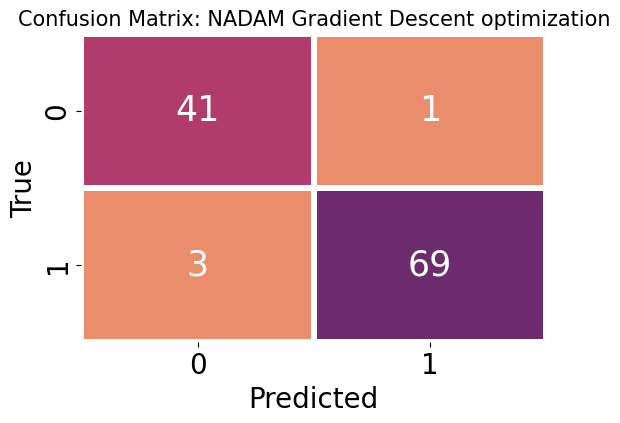

F1 score: 0.971830985915493
Precision: 0.9857142857142858


In [ ]:
# Logistic regression with Nadam gradient descent optimization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Function for training the model
def logistic_regression_train_nadam(X_train, y_train, learning_rate=0.01, num_epochs=400, beta1=0.9, beta2=0.999, epsilon=1e-8):
    num_features = X_train.shape[1]
    num_samples = X_train.shape[0]

    # Weigths and bias initialization
    weights = np.zeros((num_features,))
    bias = 0

    # Moments initialization
    m_w, v_w = np.zeros_like(weights), np.zeros_like(weights)
    m_b, v_b = 0, 0

    # Model training
    for epoch in range(num_epochs):
        # Calculate weighted sum using vectorization
        linear_model = np.dot(X_train, weights) + bias

        #  Calculate probabilities using sigmoid activation function
        y_pred = sigmoid(linear_model)

        # Calculate gradients using derivatives of binary cross-entropy function
        dw = (1 / num_samples) * np.dot(X_train.T, (y_pred - y_train))
        db = (1 / num_samples) * np.sum(y_pred - y_train)

        # Update moments
        m_w = beta1 * m_w + (1 - beta1) * dw
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        m_b = beta1 * m_b + (1 - beta1) * db
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

        # Correction of moment biases
        m_w_hat = m_w / (1 - beta1 ** (epoch + 1))
        v_w_hat = v_w / (1 - beta2 ** (epoch + 1))
        m_b_hat = m_b / (1 - beta1 ** (epoch + 1))
        v_b_hat = v_b / (1 - beta2 ** (epoch + 1))

        # Update parameters using Nadam
        nadam_update_w = learning_rate * (beta1 * m_w_hat + (1 - beta1) * dw / (1 - beta1 ** (epoch + 1))) / (np.sqrt(v_w_hat) + epsilon)
        nadam_update_b = learning_rate * (beta1 * m_b_hat + (1 - beta1) * db / (1 - beta1 ** (epoch + 1))) / (np.sqrt(v_b_hat) + epsilon)

        weights -= nadam_update_w
        bias -= nadam_update_b

        # Calculate loss function
        loss = binary_cross_entropy(y_train, y_pred)

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

    return weights, bias

# Function for runnig the logistic regression model
def logistic_regression_predict(X_test, weights, bias):
    linear_model = np.dot(X_test, weights) + bias
    y_pred = sigmoid(linear_model)
    return y_pred.round()

# Train the model
weights, bias = logistic_regression_train_nadam(X_train, y_train)

# Run the model
y_pred = logistic_regression_predict(X_test, weights, bias)

# Calculate and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size':25}, cbar=False, cmap=sns.color_palette('flare'))
plt.title('Confusion Matrix: NADAM Gradient Descent optimization', fontsize=15)
plt.ylabel('True', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Each optimization variant of logistic regression using different gradient descent methods was run with an equal number of training epochs = 400. The models optimized with Adam and Nadam showed the best precision scores. Overall, the classification results of the logistic regression model optimized with Adam or Nadam gradient descent methods matched the results of the built-in logistic regression function from sklearn: F1 score = 0.97, Precision = 0.986. The result slightly differs with the Adamax optimization, where the F1 score is higher, and the precision is slightly lower: F1 score = 0.98, Precision = 0.97. However, as noted earlier, given our data, it is better to focus on precision to minimize undetected malignant samples.

The model optimized with standard gradient descent lags behind the other models, although the result is still good: F1 score = 0.96, Precision = 0.96.

In [ ]:
%pip install pygad

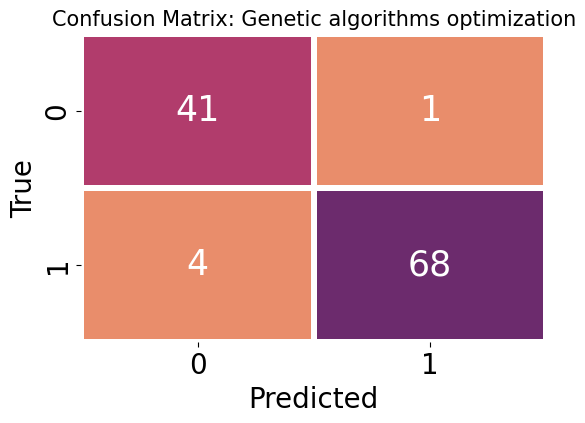

F1 score: 0.9645390070921985
Precision: 0.971830985915493


In [ ]:
import pygad
from sklearn.metrics import accuracy_score

def fitness_function(ga_instance, solution, solution_idx):
    h = 1 / (1 + np.exp(-np.dot(X_train, solution)))
    predictions = (h >= 0.5).astype(int)
    accuracy = accuracy_score(y_train, predictions)
    return accuracy

num_generations=20
population_size=30
num_features = X_train.shape[1]
random_seed = 42
initial_population = np.random.random(size=(population_size, num_features))

ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=2,
                        fitness_func=fitness_function,
                        sol_per_pop=20,
                        num_genes=num_features,
                        keep_parents=1,
                        parent_selection_type='sss',
                        crossover_type='two_points',
                        mutation_type='random',
                        mutation_percent_genes=20,
                        initial_population=initial_population)

ga_instance.run()

best_solution = ga_instance.best_solution()

# Extract best parameters
best_weights = best_solution[0]
#print(best_weights)

def predict_logistic_regression(X_test, weights):
    predictions = 1 / (1 + np.exp(-np.dot(X_test, weights)))
    predictions = (predictions >= 0.5).astype(int)
    return predictions

# Run the model
predictions = predict_logistic_regression(X_test, best_weights)

# Calculate and visualize confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size':25}, cbar=False, cmap=sns.color_palette('flare'))
plt.title('Confusion Matrix: Genetic algorithms optimization', fontsize=15)
plt.ylabel('True', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print("F1 score:", f1_score(y_test, predictions))
print("Precision:", precision_score(y_test, y_pred))

In [ ]:
import itertools
from tqdm.notebook import tqdm_notebook
import warnings

warnings.filterwarnings("ignore")

param_grid = {
    'num_generations': [20, 30, 40],
    'num_parents_mating': [2, 4, 6],
    'sol_per_pop': [10, 20, 30],
    'mutation_percent_genes': [5, 10, 20],
    'parent_selection_type': ["sss", "rws", "tournament"],
    'crossover_type': ["single_point", "two_points", "uniform"],
    'mutation_type': ["random", "swap", "inversion"]
}

total_combinations =  np.shape([i for i in itertools.product(*param_grid.values())])
population_size=30
num_features = X_train.shape[1]
best_params = None
best_fitness = -np.inf
initial_population = np.random.random(size=(population_size, num_features))
# Iterate over all combinations of parameters
for params in tqdm_notebook(itertools.product(*param_grid.values()), total=total_combinations[0], desc="Grid Search"):
  num_generations, num_parents_mating, sol_per_pop, mutation_percent_genes, parent_selection_type, crossover_type, mutation_type = params

  ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_features,
                        parent_selection_type=parent_selection_type,
                        keep_parents=1,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        initial_population=initial_population)

  ga_instance.run()
  solution, solution_fitness, solution_idx = ga_instance.best_solution()

  if solution_fitness > best_fitness:
    best_fitness = solution_fitness
    best_params = params

Grid Search:   0%|          | 0/2187 [00:00<?, ?it/s]

In [ ]:
# Best parameters for genetic algorithm
best_params_dict = {
    'num_generations': best_params[0],
    'num_parents_mating': best_params[1],
    'sol_per_pop': best_params[2],
    'mutation_percent_genes': best_params[3],
    'parent_selection_type': best_params[4],
    'crossover_type': best_params[5],
    'mutation_type': best_params[6],
    'best_fitness': best_fitness
}

best_params_df = pd.DataFrame([best_params_dict])
best_params_df.transpose()

0
num_generations                 20
num_parents_mating               2
sol_per_pop                     10
mutation_percent_genes          20
parent_selection_type          sss
crossover_type          two_points
mutation_type               random
best_fitness              0.991209

Best weights: [-29.14646174  16.305975     5.84689211   5.97295977  16.8729437
   5.20736423  -1.40891671 -10.64948671]
[[41  1]
 [ 5 67]]


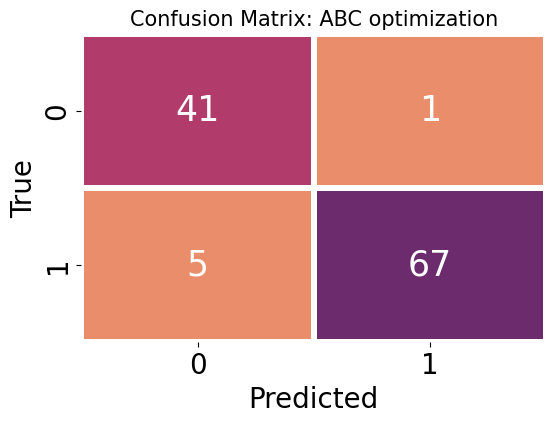

F1 score: 0.9571428571428572
Precision: 0.971830985915493


In [ ]:
from scipy.special import logsumexp

# Fitness function for binary classification using logistic regression
def fitness_function(solution):
    z = np.dot(X_train, solution)
    h = 1 / (1 + np.exp(-np.clip(z, -250, 250)))  # Limit values of z to prevent overflow
    predictions = (h >= 0.5).astype(int)
    accuracy = accuracy_score(y_train, predictions)
    return accuracy


class ArtificialBeeColony:
    def __init__(self, func, num_vars, lower_bound, upper_bound, num_bees, max_iter, limit):
        self.func = func
        self.num_vars = num_vars
        self.lower_bound = np.array(lower_bound)
        self.upper_bound = np.array(upper_bound)
        self.num_bees = num_bees
        self.max_iter = max_iter
        self.limit = limit
        # Ensure lower_bound and upper_bound are NumPy arrays for element-wise operations
        self.population = np.random.rand(num_bees, num_vars) * (self.upper_bound - self.lower_bound) + self.lower_bound
        self.fitness = np.array([func(ind) for ind in self.population])
        self.best_solution = np.copy(self.population[np.argmin(self.fitness)])
        self.best_fitness = np.max(self.fitness)
        self.trial_counter = np.zeros(num_bees)  # Initialize trial counter for each bee
        self.history = []

    def update_bee(self, index):
        phi = np.random.uniform(-1, 1, size=(self.num_vars,))
        k = np.random.randint(self.num_bees)
        while k == index:  # ensure k is not the same as index
            k = np.random.randint(self.num_bees)
        candidate = self.population[index] + phi * (self.population[index] - self.population[k])
        candidate = np.clip(candidate, self.lower_bound, self.upper_bound)
        candidate_fitness = self.func(candidate)
        if candidate_fitness > self.fitness[index]:
            self.population[index] = candidate
            self.fitness[index] = candidate_fitness
            self.trial_counter[index] = 0
            if candidate_fitness > self.best_fitness:
                self.best_fitness = candidate_fitness
                self.best_solution = candidate
        else:
            self.trial_counter[index] += 1

    def employed_bee_phase(self):
        for i in range(self.num_bees):
            self.update_bee(i)

    def onlooker_bee_phase(self):
        # Calculate probabilities inversely related to fitness (higher fitness -> lower probability)
        fitness_prob = 1.0 / (1.0 + self.fitness)
        prob = fitness_prob / np.sum(fitness_prob)

        # Flatten the probability array to ensure it is 1-dimensional
        prob = prob.flatten()  # This makes sure 'p' is 1-dimensional

        for _ in range(self.num_bees):
            index = np.random.choice(self.num_bees, p=prob)
            self.update_bee(index)

    def scout_bee_phase(self):
        for i in range(self.num_bees):
            if self.trial_counter[i] > self.limit:  # Check if the limit is exceeded
                self.population[i] = np.random.rand(self.num_vars) * (self.upper_bound - self.lower_bound) + self.lower_bound
                self.fitness[i] = self.func(self.population[i])
                self.trial_counter[i] = 0  # Reset the trial counter

    def optimize(self):
        for _ in range(self.max_iter):
            self.employed_bee_phase()
            self.onlooker_bee_phase()
            self.scout_bee_phase()
            #print(f"Best fitness so far: {-self.best_fitness}")
            self.history.append(self.best_fitness)

# Parameters
num_vars = X_train.shape[1]  # Dimensionality of the problem
lower_bound = np.array([-32.768] * num_vars)
upper_bound = np.array([32.768] * num_vars)
num_bees = 100
max_iter = 200
limit = 20  # Trial limit before becoming a scout

# Optimization
abc = ArtificialBeeColony(fitness_function, num_vars, lower_bound, upper_bound, num_bees, max_iter, limit)
abc.optimize()

best_weights = abc.best_solution

print("Best weights:", best_weights)

def predict_logistic_regression(X_test, weights):
    z = np.dot(X_test, weights)
    predictions = 1 / (1 + np.exp(-np.clip(z, -250, 250)))  # Limit values of z to prevent overflow
    predictions = (predictions >= 0.5).astype(int)
    return predictions

# Run the model on test data set
predictions = predict_logistic_regression(X_test, best_weights)

# Calculate and visualize confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size':25}, cbar=False, cmap=sns.color_palette('flare'))
plt.title('Confusion Matrix: ABC optimization', fontsize=15)
plt.ylabel('True', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

print("F1 score:", f1_score(y_test, predictions))
print("Precision:", precision_score(y_test, y_pred))

## Summary
A classification was performed using logistic regression optimized with genetic and particle swarm algorithms. For tuning the parameters of the genetic algorithm, a grid search was conducted. The fitness function converged, and the algorithm found the optimal model parameters. The classification result of the model optimized with the genetic algorithm was: F1 score = 0.957, Precision = 0.958. The classification result of the model optimized with the particle swarm algorithm was similar. Overall, the result is good but slightly worse than the model optimized with the Adam gradient descent. Considering the instability of the results due to the influence of randomness, for binary classification with real features like the "Breast Cancer Wisconsin (Diagnostic)" dataset, a logistic regression model optimized with Adam or Nadam gradient descent methods, or the highly optimized logistic regression model built into the sklearn library, is more suitable. The best F1 score was achieved by the model optimized with Adamax gradient descent, but its precision score was lower. In the context of data on malignancy/benignity of cells, the precision score is more important to minimize undetected malignant samples.

